# Lab 3: CNNs and Deep Learning 
**(version 1.0)**

### TBMI26/732A55 Neural Networks and Learning Systems 2020
### Michael Felsberg
---

#### *Hint: Use the provided test cases to check if your solutions are valid.*

---
## 2D Convolution
It is widely used with 2D signals such as images. For the further steps, we often need to visualize an image and we define a shortcut for that:

In [1]:
from matplotlib import pyplot as plt

def visualize(img, title=''):
    plt.imshow(img,'gray')
    plt.colorbar()
    plt.title(title)
    plt.show()
    print('Image size:', img.shape)

---
**Task 1:** Convolution can be performed in 2D using the function `scipy.signal.convolove2d()`. Use this function to generate a 2D kernel of size $33\times33$ by five times cascading 2D convolutions of $H$ with itself, starting with $H = \begin{array}{|c|c|}
      \hline
      1 & 1 \\
      \hline
      1 & 1 \\
      \hline
    \end{array}/4$.   
*Visualize* the kernel using `visualize` function defined above.   

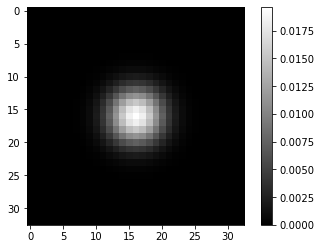

Image size: (33, 33)


In [2]:
# YOUR CODE HERE
#raise NotImplementedError()
import numpy as np
import scipy.signal as si
import matplotlib.pyplot as plt
import matplotlib.image as im

H=np.ones((2,2))/4

for i in range(5):
    H=si.convolve2d(H,H,mode='full',boundary='fill',fillvalue=0)

visualize(H)

In [3]:
### TEST CELL. PLEASE DON'T CHANGE ###
assert(H.sum().round()==1)

---
**Task 2:** Now, load the image `'MR15^044.JPG'` (a sample from ImageNet), **sum** its RGB-channels, **normalize** it to the range [0,1], and convolve it with $H$ from task 3 under the options `'valid'` and `'same'`. 

What differences do you observe regarding the size of the output?



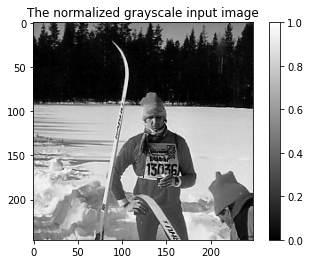

Image size: (246, 248)


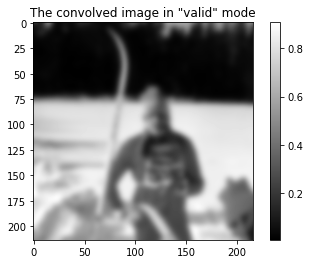

Image size: (214, 216)


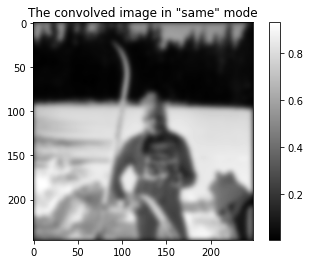

Image size: (246, 248)


In [4]:
# YOUR CODE HERE
#raise NotImplementedError()
img=im.imread("MR15^044.JPG")
img_sum=np.sum(img,axis=2)
img_gray=(img_sum-np.min(img_sum))/(np.max(img_sum)-np.min(img_sum))
omg_sc_valid=si.convolve2d(img_gray,H,mode="valid",boundary='fill',fillvalue=0)
omg_sc_same=si.convolve2d(img_gray,H,mode="same",boundary='fill',fillvalue=0)

visualize(img_gray, 'The normalized grayscale input image')      
visualize(omg_sc_valid, 'The convolved image in "valid" mode')
visualize(omg_sc_same, 'The convolved image in "same" mode')

In [5]:
### TEST CELL. PLEASE DON'T CHANGE ###
assert(img_gray.max() == 1.0)
assert(omg_sc_valid.shape == (214, 216))
assert(omg_sc_same.shape == (246, 248))

---
## Strided convolution

In strided convolution, samples are removed based on the stride. According to the Nyquist theorem, this can generate aliasing artifacts.  

**Task 3:** Visualize the input image and the second output image from task 4, `omg_sc_same`, while only keping every *fifth* row and column. 

*Hint*: Use Python extended slicing, read this guid on [extended slices](https://docs.python.org/2.3/whatsnew/section-slices.html)


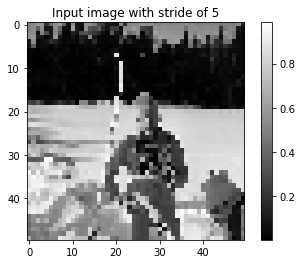

Image size: (50, 50)


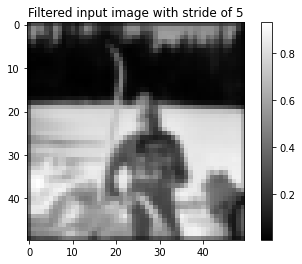

Image size: (50, 50)


In [6]:
# YOUR CODE HERE
#raise NotImplementedError()
img_gray_ds=img_gray[::5,::5]
omg_sc_same_ds=omg_sc_same[::5,::5]

visualize(img_gray_ds, 'Input image with stride of 5')
visualize(omg_sc_same_ds, 'Filtered input image with stride of 5')

What do you observe, in particular at the ski?

YOUR ANSWER HERE

They are replaced by generalized lines and sattered grey pixels, which is caused by skiping representation

## Convolution in PyTorch
PyTorch is an open source machine learning library based on the Torch library, used for applications such as computer vision and natural language processing. It is primarily developed by Facebook's AI Research lab.

We will start by utilizing PyTorch to perform convolution operations in 2D.

---
**Task 4:** Apply the cascaded $33\times33$ filter from task 1 to the image using a `torch.nn.Conv2d` layer. 

Compare the results from *Scipy* in task 2 and *PyTorch* in this task by subtracting the output images.

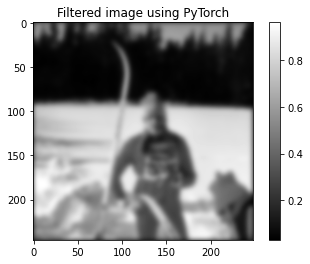

Image size: (246, 248)


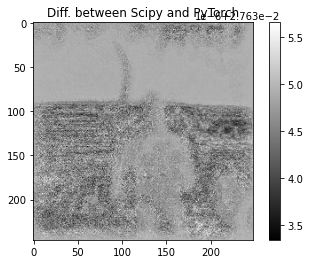

Image size: (246, 248)
0.027634710981314547


In [7]:
# YOUR CODE HERE
#raise NotImplementedError()
import torch

k=torch.nn.Conv2d(1,1,33,stride=1,padding=16)
k.weight=torch.nn.Parameter(torch.Tensor(np.reshape(H,(1,1,33,33))))
#h=torch.Tensor.cpu(k.weight).detach().numpy()[-1,-1,:,:]
#visualize(h)
out_2d_np=k(torch.Tensor(np.reshape(img_gray,(1,1,246,248))))
out_2d_np=torch.Tensor.cpu(out_2d_np).detach().numpy()[-1,-1,:,:]

# is it OK to use nn.functional.conv2d
#out_2d_np=torch.nn.functional.conv2d(torch.Tensor(np.reshape(img_gray,(1,1,246,248))),torch.Tensor(np.reshape(H,(1,1,33,33))),stride=1,padding=16)
#out_2d_np=torch.Tensor.cpu(out_2d_np).detach().numpy()[-1,-1,:,:]

# Hint: Convert the output tensor to numpy array
visualize(out_2d_np, 'Filtered image using PyTorch') 
diff = np.abs(out_2d_np-omg_sc_same)
visualize(diff, 'Diff. between Scipy and PyTorch')
print(diff.mean())

In [8]:
### TEST CELL. PLEASE DON'T CHANGE ###
assert(diff.mean()<1e-7)

AssertionError: 

---
**Task 5:** Repeat the previous task with stride 5. Compare with `omg_sc_same_ds` from task 3.

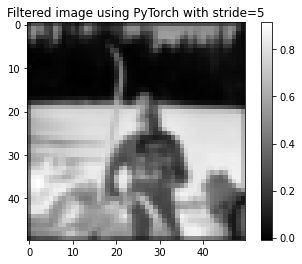

Image size: (50, 50)


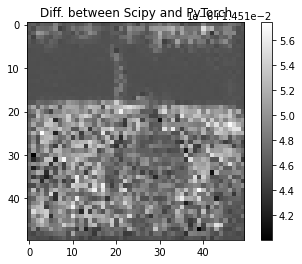

Image size: (50, 50)
0.014514766383735406


In [11]:
# YOUR CODE HERE
#raise NotImplementedError()

k=torch.nn.Conv2d(1,1,33,stride=5,padding=16)
k.weight=torch.nn.Parameter(torch.Tensor(np.reshape(H,(1,1,33,33))))
out_2d_s5_np=k(torch.Tensor(np.reshape(img_gray,(1,1,246,248))))
out_2d_s5_np=torch.Tensor.cpu(out_2d_s5_np).detach().numpy()[-1,-1,:,:]

# Hint: Convert the output tensor to numpy array
visualize(out_2d_s5_np, 'Filtered image using PyTorch with stride=5') 
diff_s5 = np.abs(out_2d_s5_np-omg_sc_same_ds)
visualize(diff_s5, 'Diff. between Scipy and PyTorch')
print(diff_s5.mean())

In [12]:
### TEST CELL. PLEASE DON'T CHANGE ###
assert(diff_s5.mean()<1e-6)

AssertionError: 

---
**Task 6:** Repeat task 5 with stride of 5 and a $1\times1$ filter. Compare with `img_gray_ds` from task 3.

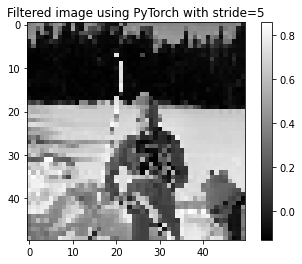

Image size: (50, 50)


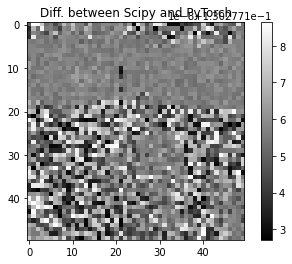

Image size: (50, 50)
0.13027715645498525


In [13]:
# YOUR CODE HERE
#raise NotImplementedError()

k=torch.nn.Conv2d(1,1,1,stride=5,padding=0)
k.weight=torch.nn.Parameter(torch.ones(1,1,1,1))
out_2d_s5_1_np=k(torch.Tensor(np.reshape(img_gray,(1,1,246,248))))
#out_2d_s5_1_np=torch.Tensor.cpu(out_2d_s5_1_np).detach().numpy()[-1,-1,:,:]
out_2d_s5_1_np=out_2d_s5_1_np[-1,-1,:,:].detach().cpu().numpy()

# Hint: Convert the output tensor to numpy array
visualize(out_2d_s5_1_np, 'Filtered image using PyTorch with stride=5') 
diff_s5_1 = np.abs(out_2d_s5_1_np-img_gray_ds)
visualize(diff_s5_1, 'Diff. between Scipy and PyTorch')
print(diff_s5_1.mean())

In [14]:
### TEST CELL. PLEASE DON'T CHANGE ###
assert(diff_s5_1.mean()<1e-7)

AssertionError: 

---
## Training a PyTorch Convolution layer

Now, we want the network to learn the convolution filter given the input and the filtered output.

**Task 7:** Considering the input image tensor `inp_2d` from task 4 as a *batch* and the filtered output `out_2d_t` as a label, use `torch.optim.SGD` to learn the the filter $H$.

**Hints**:
- Use the L1 loss from `torch.nn.functional.l1_loss`.
- Use a small learning rate.
- Detach `out_2d_t` from the model graph in task 4 to avoid errors.
- Iterate for 500 iterations.
- Clip the weights after each iteration to $[0, \infty[$ for stable convergence.
- Print the loss every 100 steps.

The loss for 100th loop is 2.6718978881835938
The loss for 200th loop is 2.59892201423645
The loss for 300th loop is 2.5377695560455322
The loss for 400th loop is 2.4829108715057373
The loss for 500th loop is 2.4320826530456543


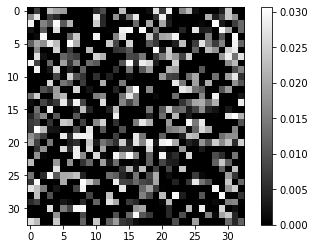

Image size: (33, 33)


In [15]:
# Define the model and the optimizer
# YOUR CODE HERE
#raise NotImplementedError()


inp_2d=torch.Tensor(np.reshape(img_gray,(1,1,246,248))) ## Input variable
out_2d_t=torch.Tensor(np.reshape(out_2d_np,(1,1,246,248)))   ## Label

model_1layer=torch.nn.Conv2d(1,1,33,stride=1,padding=16) ## model 
optimizer=torch.optim.SGD(model_1layer.parameters(),lr=1e-3)


numiter=500
for i in range(numiter):
    optimizer.zero_grad()
    predictions=model_1layer(inp_2d)
    loss=torch.nn.functional.l1_loss(predictions,out_2d_t)
    loss.backward()
    optimizer.step()
    model_1layer.weight=torch.nn.Parameter(torch.max(torch.zeros(1,1,33,33),model_1layer.weight))
    if not (i+1)%100:
        print("The loss for {}th loop is {}".format(i+1,loss.data.item()))

# Visualize the trained filter
visualize(model_1layer.weight[0,0,:,:].detach().cpu().numpy())

**Task 8**:
To make the transitiong to the next task easier, redo task 7 by defining a custom PyTorch module which includes only 1 convolution layer.  
You can follow this [tutorial](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#define-the-network).  
A custom module class inherits `torch.nn.Module` class and needs to have two mandatory functions:
- `__init__(self):` where you define layers included in your module.
- `forward(self, x):` where you define the inference steps of your network.

The built-in auto-differentiation module in PyTorch will keep track of the operations that you perform in the inference steps and calculates their derivatives when you back-propagate the loss function during training.

The loss for 100th loop is 2.8235487937927246
The loss for 200th loop is 2.7481305599212646
The loss for 300th loop is 2.6851553916931152
The loss for 400th loop is 2.6292073726654053
The loss for 500th loop is 2.5772101879119873


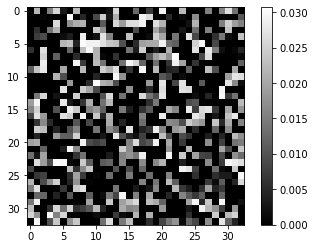

Image size: (33, 33)


In [16]:
# YOUR CODE HERE
#raise NotImplementedError()

class myNet(torch.nn.Module):
    def __init__(self):
        super(myNet,self).__init__()
        self.conv1=torch.nn.Conv2d(1,1,33,stride=1,padding=16)
          
    def forward(self,x):
        x=self.conv1(x)
        return x

inp_2d=torch.Tensor(np.reshape(img_gray,(1,1,246,248))) ## Input variable
out_2d_t=torch.Tensor(np.reshape(out_2d_np,(1,1,246,248)))   ## Label
net=myNet()
optimizer=torch.optim.SGD(net.parameters(),lr=1e-3)


numiter=500
for i in range(numiter):
    optimizer.zero_grad()
    predictions=net.forward(inp_2d)
    loss=torch.nn.functional.l1_loss(predictions,out_2d_t)
    loss.backward()
    optimizer.step()
    net.conv1.weight=torch.nn.Parameter(torch.max(torch.zeros(1,1,33,33),net.conv1.weight))
    if not (i+1)%100:
        print("The loss for {}th loop is {}".format(i+1,loss.data.item()))



# Visualize the trained filter
visualize(net.conv1.weight[0,0,:,:].detach().cpu().numpy())
        

---
## Training a whole network
So far, we have experimented with training a single convolution layer. Now we try to train a whole network to perform the task of image classification on CIFAR-10 dataset.  
But first, make sure that CUDA is available by running the following command:

In [17]:
import torch
print("CUDA Available: ",torch.cuda.is_available())

CUDA Available:  False


**Task 9:** We will train on CIFAR10, which is readily available at `torchvision.datasets.CIFAR10`. 

Create a dataloader for the *training* and the *test* sets of CIFAR10 using `torch.utils.data.DataLoader` , then show some examples from the training set using `torchvision.utils.make_grid` and print out their labels. 

*Hints* :
- The `imshow` function for visualizing the images is provided below.
- Use `torchvision.transforms` to perform whitening on images (normalization using the mean and the standard deviation).
- Use a batch size of 64.

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision 

def imshow(img):
    img = img * 0.2 + 0.5  # Un-Normalize, Change according to your normalization
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    return npimg.mean()

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# YOUR CODE HERE
#raise NotImplementedError()

trainset=torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=torchvision.transforms)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True,num_workers=0)

# Show some random images
dataiter = iter(trainloader)
images,labels=dataiter.next()
grid_img = torchvision.utils.make_grid(images)
imshow(grid_img)

# Print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

Files already downloaded and verified


TypeError: 'module' object is not callable

In [3]:
### TEST CELL. PLEASE DON'T CHANGE ###
assert(grid_img.std()>0.8)

NameError: name 'grid_img' is not defined

---
## Baseline Model
**Task 10:** Build the depicted LeNet5-inspired model using PyTorch standard components. Assume a **padding** with `same` mode for all convolution layers.   
Try to figure out the missing dimension at the first fully connected layer.
![architecture](arch.png)

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class LeNet5(nn.Module):
    def __init__(self):
        super().__init__()                
        # Define the network
        # YOUR CODE HERE
        #raise NotImplementedError()
        self.conv1_1=nn.Conv2d(3,32,3,stride=1,padding=1)
        self.conv1_1_bn=nn.BatchNorm2d(32)
        self.conv1_2=nn.Conv2d(32,64,3,stride=1,padding=1)
        
        self.conv2_1=nn.Conv2d(64,128,3,stride=1,padding=1)
        self.conv2_1_bn=nn.BatchNorm2d(128)
        self.conv2_2=nn.Conv2d(128,128,3,stride=1,padding=1)
        
        self.conv3_1=nn.Conv2d(128,256,3,stride=1,padding=1)
        self.conv3_1_bn=nn.BatchNorm2d(256)
        self.conv3_2=nn.Conv2d(256,256,3,stride=1,padding=1)
        
        self.fc1=nn.Linear(2304,1024)
        self.fc2=nn.Linear(1024,512)
        self.fc3=nn.Linear(512,10)
        
        
    def forward(self, x):
        # Perform Inference            
        # YOUR CODE HERE
        #raise NotImplementedError()
        x=F.relu(self.conv1_1_bn(self.conv1_1(x)))
        x=F.max_pool2d(F.relu(self.conv1_2(x)),2)
        
        x=F.relu(self.conv2_1_bn(self.conv2_1(x)))
        x=F.dropout2d(F.max_pool2d(F.relu(self.conv2_2(x)),2),p=0.05)
        
        x=F.relu(self.conv3_1_bn(self.conv3_1(x)))
        x=F.max_pool2d(F.relu(self.conv3_2(x)),2)
        
        x=x.view(-1,2304)
        x=F.relu(self.fc1(F.dropout(x,p=0.1)))
        x=F.dropout(F.relu(self.fc2(x)),p=0.1)
        x=self.fc3(x)
        

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = LeNet5().to(device)

---
**Task 11:** Train the LeNet5 model for 40 epochs using a suitable batch size and display the result.

*Hints*:
- Define an optimizer, e.g. SGD optimizer.
- Define a suitable loss function.
- Iterate for 40 epochs and at each epoch calculate a running loss and accuracy on the training set.
- After each epoch, evaluate the model on the test set. You can achieve this by **completing** the `test` function below that performs *only* inference on the test set and calculates the accuracy.

In [7]:
# A function to plot the accuracy training history
def plot_model_history(history):
    plt.figure(0)
    plt.plot(history['train'],'r', lw=3)
    plt.plot(history['test'],'b', lw=3)
    plt.rcParams['figure.figsize'] = (8, 6)
    plt.xlabel("Epoch number")
    plt.ylabel("Accuracy")
    plt.title("Training Accuracy vs Test Accuracy")
    plt.legend(['Training','Test'])
    plt.grid(True)

# Test function that runs only inference
def test(model, testloader):
    correct = 0
    total = 0
    # YOUR CODE HERE
    #raise NotImplementedError()
    predictions=model.forward(testloader.images)  ## images of dataset
    correct=sum(predictions==testloader.label)  ## labels of dataset
    total=len(testloader.label)
    
    print('Test Accuracy: %d %%' % (100 * correct / total))
    return correct / total

In [11]:
NUM_EPOCHS = 40
LR = 0.01

# Define a proper optimizer and a proper loss function
# YOUR CODE HERE
#raise NotImplementedError()
optimizer=torch.optim.SGD(net.parameters(),lr=LR)
loss_func=torch.nn.functional.multilabel_soft_margin_loss

acc_history = {'train':[], 'test':[]}

# Iterate for N epochs
# YOUR CODE HERE
#raise NotImplementedError()
for i in range(NUM_EPOCHS):
    optimizer.zero_grad()
    predictions=net.forward(trainloader)  ## images of train data
    loss=loss_func(predictions,trainloader) ## labels of train data
    loss.backward()
    optimizer.step()
    net.weight=torch.nn.Parameter(torch.max(torch.zeros(1,1,33,33),net.weight))
    acc_train=test(net,trainloader) ## labels of train data
    acc_test=test(net,testloader)  ## labels of test data
    acc_history.append({'train':acc_train, 'test':acc_test})


print('Finished Training!')

plot_model_history(acc_history)

# Let's quickly save our trained model:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

TypeError: conv2d(): argument 'input' (position 1) must be Tensor, not DataLoader

## == MANDATORY QUESTIONS END HERE ==

---

### Baseline + Decaying Learning Rate
In most papers, the learning rate is successively reduced in order to boost the final performance, e.g. divided by two after 20 and 30 epochs.  
**[EXTRA]**
**Task 12:** Define a suitable function and train the previous model with decaying learning rate. Plot the result and compare it to the baseline.

In [ ]:
def adjust_learning_rate(optimizer, epoch):    
    for param_group in optimizer.param_groups:
        lrate = param_group["lr"]
        # YOUR CODE HERE
        raise NotImplementedError()

In [ ]:
net_lr = LeNet5().to(device)

# Define a proper optimizer and a proper loss function
# YOUR CODE HERE
raise NotImplementedError()

acc_history_lr = {'train':[], 'test':[]}
# Iterate for N epochs
# YOUR CODE HERE
raise NotImplementedError()
print('Finished Training!')

plot_model_history(acc_history_lr)

# Let's quickly save our trained model:
PATH = './cifar_net_lr.pth'
torch.save(net_lr.state_dict(), PATH)

---
### Baseline +  Decaying Learning rate + Data Augmentation 
**[EXTRA]**
**Task 13:** Data augmentation is known to reduce overfitting. Use `torchvision.transforms`to perform additional augmentation with flipping and random cropping. Adjust the number of epochs and the learning rate schedule if needed. What do you observe?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:

net_lr_wr_aug = LeNet5().to(device)

# Define a proper optimizer and a proper loss function
# YOUR CODE HERE
raise NotImplementedError()

acc_history_lr_wr_aug = {'train':[], 'test':[]}
# Iterate for N epochs
# YOUR CODE HERE
raise NotImplementedError()
print('Finished Training!')

plot_model_history(acc_history_lr_wr_aug)

# Let's quickly save our trained model:
PATH = './cifar_net_lr_wr_aug.pth'
torch.save(net_lr_wr_aug.state_dict(), PATH)